# Recurrent Neural Network Simulating a Dynamic System

In [1]:
! pip3 install sympy matplotlib

## 1. Definition of a Dynamic Process

Classes DynamicModel and DynamicProcess are defined file DynamicSystem.py. DynamicModel holds a description of a dynamic system in a symbolic form and as a differential equation. DynamicProcess helps to model a response (time series) of such model for a random input.   

In [18]:
from sympy.abc import s, t, y, x, y, z

In [19]:
from DynamicSystem import DynamicModel, DynamicProcess

### 1.1 Symbolic Definition of a Chosen System

In [20]:
G = 5*(s+1)/((s+3)*(s+2))
dynamic_model = DynamicModel(G)

In [21]:
dynamic_process = DynamicProcess(dynamic_model, 100)
dynamic_process.model

(5*s + 5)/((s + 2)*(s + 3))

### 1.2. Example of system responses for different inputs 

In [22]:
import matplotlib.pyplot as plt
import numpy as np

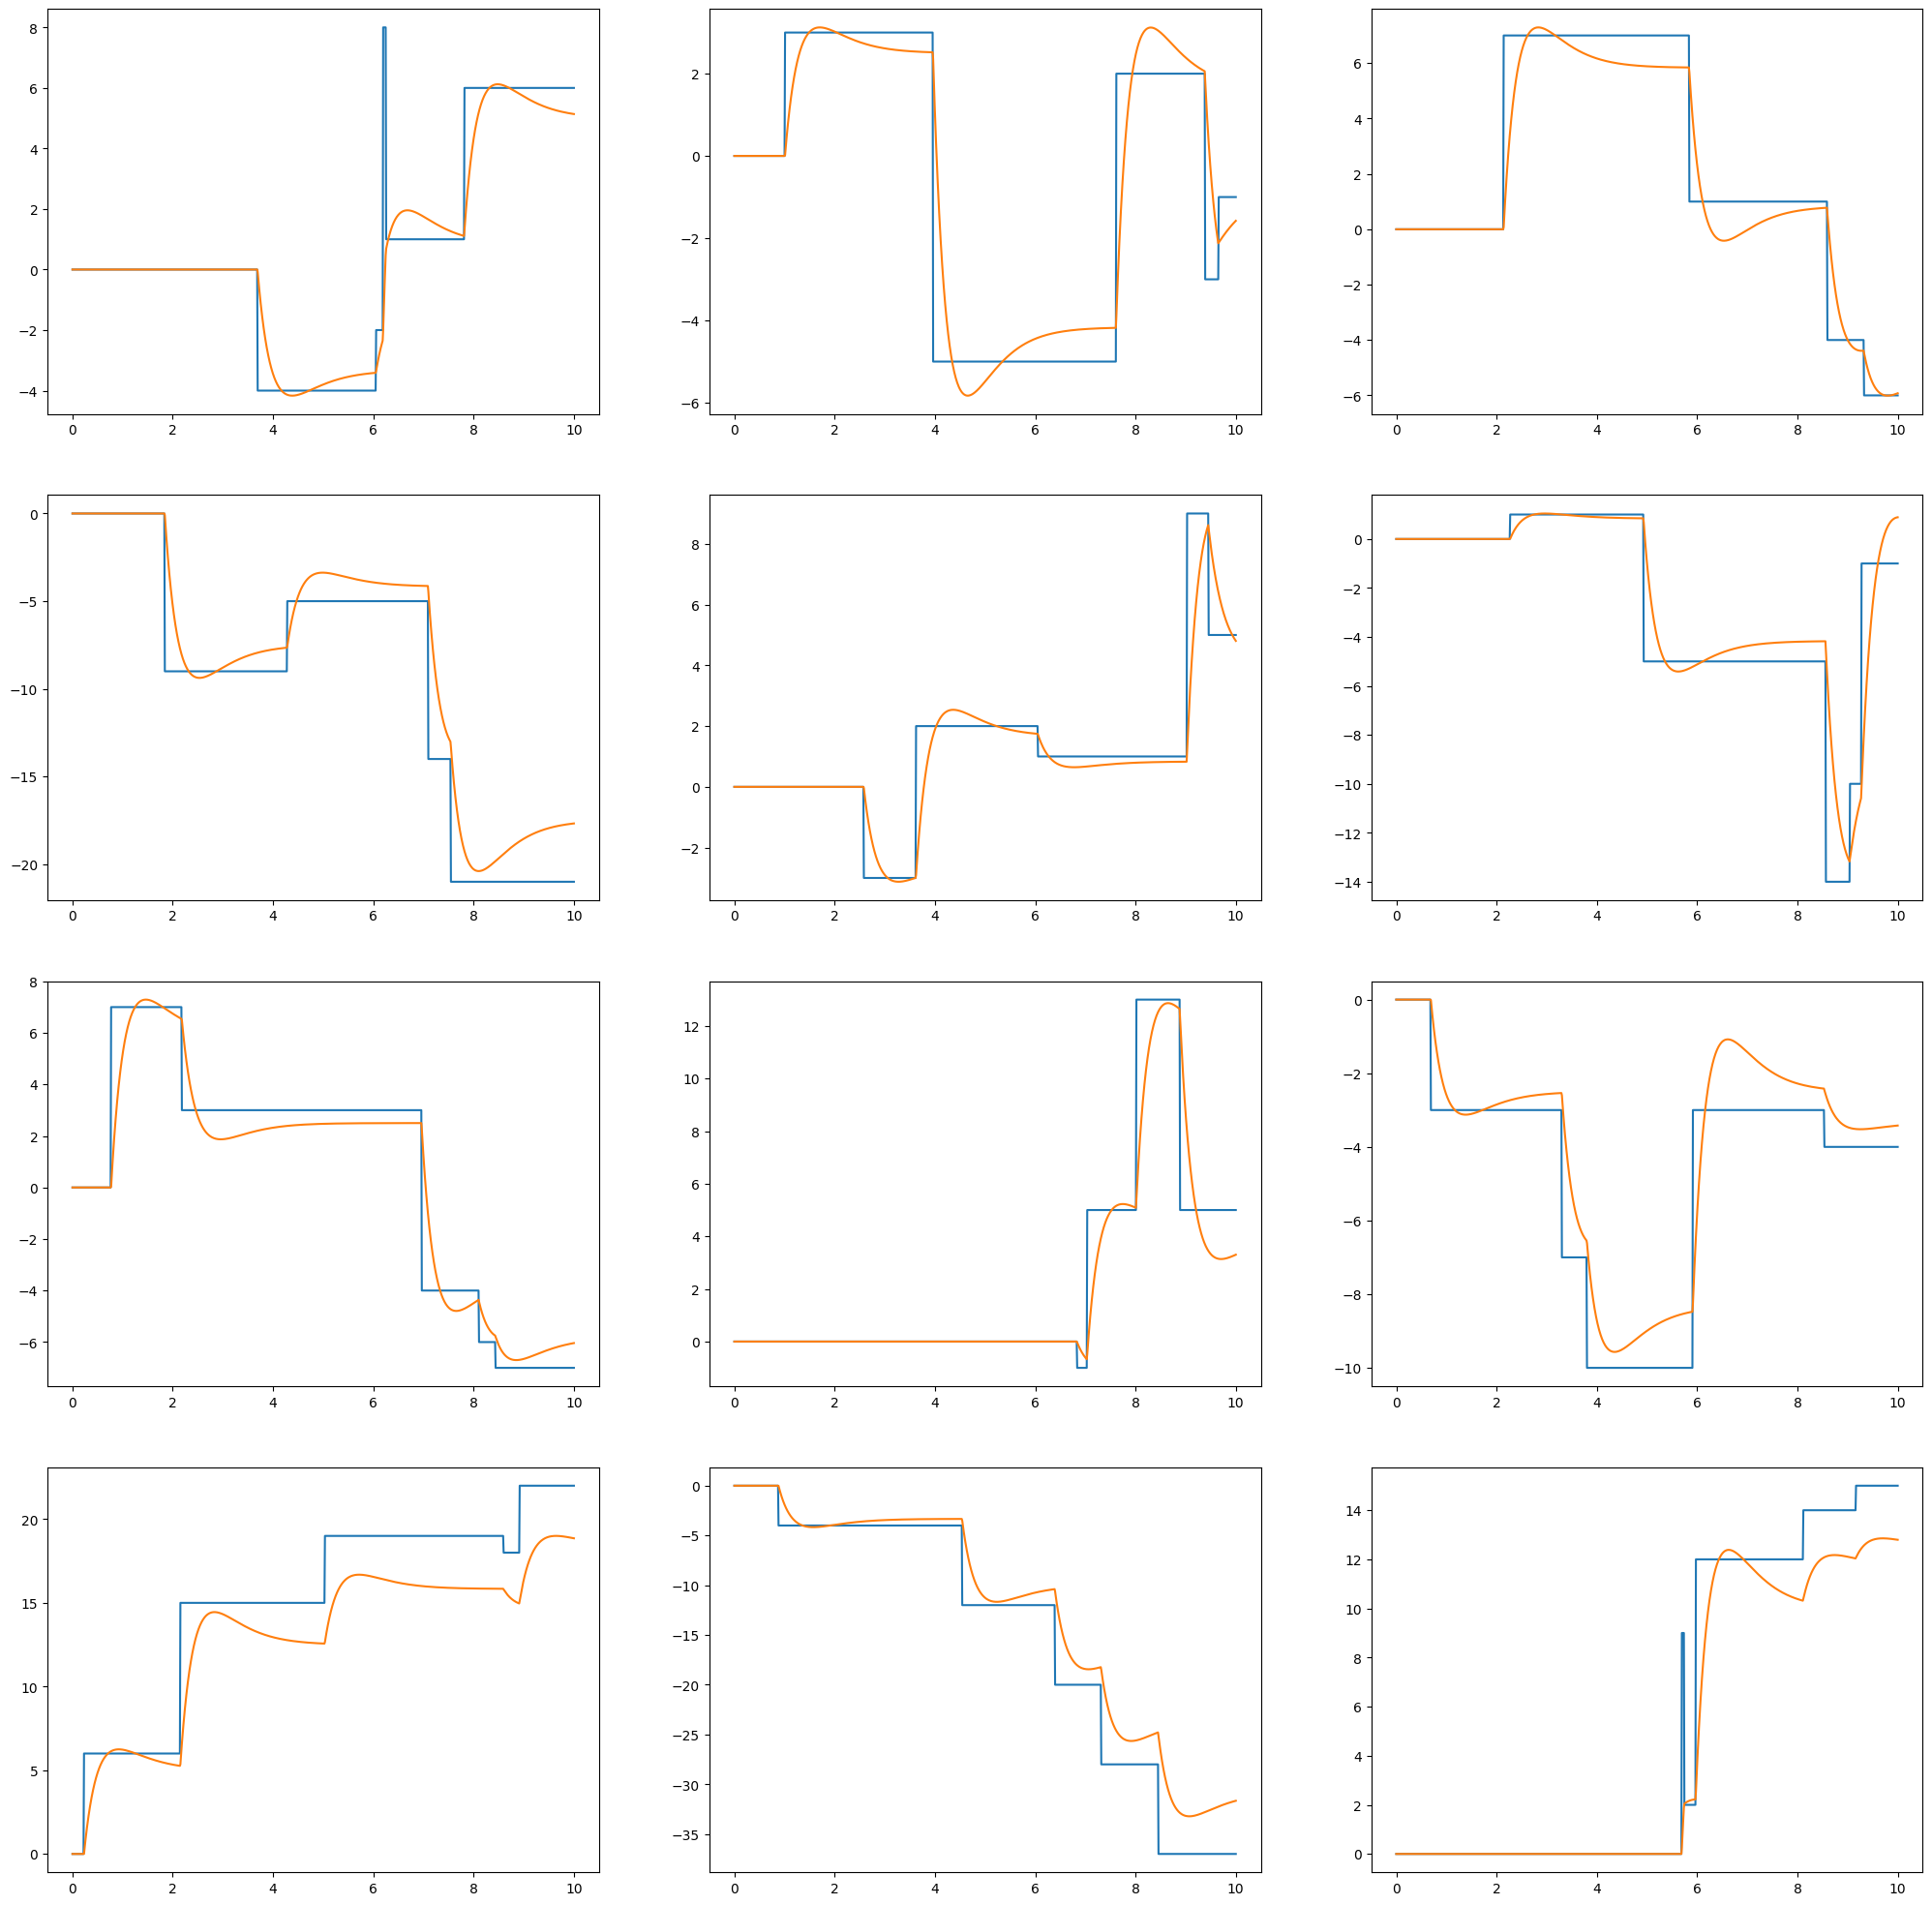

In [23]:
plt.figure(figsize=(25,25))
for i in range(12):
    t, u, y = dynamic_process.generate_time_series(10, 1000, new_inputs=True)
    plt.subplot(4,3,i+1)
    plt.plot(t, u)
    plt.plot(t, y)
plt.show()

## 2. Create Dataset

In [12]:
import pandas as pd
import os

In [52]:
n = 20
for i in range(n):
    t, u, y = dynamic_process.generate_time_series(10, 1000, new_inputs=True)
    data = {'t':t, 'u':u, 'y':y}
    df = pd.DataFrame(data)
    df.to_csv(f'dataset/{i}.csv', index=False)

Create WindowGenerator object for each batch? 

In [55]:
class WindowGenerator:
    
    def __init__(self, dataset_path, split = (.6, .2, .2)):
        self.dataset_path = dataset_path
        dataset_files = [ f'{dataset_path}/{file}' for file in os.listdir(dataset_path)]
        self.total_window_size = 100
        self.train_df = pd.read_csv(dataset_files[0])
        self.val_df = pd.read_csv(dataset_files[1])
        self.test_df = pd.read_csv(dataset_files[2])
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}
        
    def split_window(self, features):
        pass
    
    def plot(self):
        pass
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result


In [56]:
window = WindowGenerator('dataset')

In [57]:
window.train_df

,t,u,y
0,0.00000,0.0,0.000000
1,0.01001,0.0,0.000000
2,0.02002,0.0,0.000000
3,0.03003,0.0,0.000000
4,0.04004,0.0,0.000000
...,...,...,...
995,9.95996,7.0,5.833300
996,9.96997,2.0,5.588999
997,9.97998,2.0,5.353300
998,9.98999,2.0,5.127001


In [ ]:
class BaseLine(tf.keras.Model):
    
    def __init__():
        pass
    
    def call():
        pass

## 3. Prepare Data

### 3.1. Standard LSTM network

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-09-25 20:42:17.131864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-25 20:42:17.588232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-25 20:42:17.588294: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-25 20:42:17.632116: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-25 20:42:18.708284: W tensorflow/stream_executor/platform/de

In [24]:
def rnn_model():
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(40, return_sequences=True),
      tf.keras.layers.LSTM(40),
      tf.keras.layers.Dense(1),
    ])

    return model

In [25]:
rnn = rnn_model()

In [26]:
rnn.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

## Training

## Testing